In [ ]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [8]:
df = pd.read_feather("/Users/ashleychen/Downloads/output_mar (1).feather")

In [3]:
df

,text,tweetid,userid,date,rt_id,rt_userid
0,@tedcruz Says the nations greatest fraud.,710284521577402368,877951201,Thu Mar 17 02:00:01 +0000 2016,None,None
1,RT @SenSanders: I don't think many lawmakers k...,710284523561426944,190840757,Thu Mar 17 02:00:01 +0000 2016,710274237441949697,29442313
2,RT @BernieSanders: No one said the political r...,710284522818895872,130680831,Thu Mar 17 02:00:01 +0000 2016,710168492931031041,216776631
3,@realDonaldTrump @oreillyfactor TRUMP KEEPS H...,710284524886872064,2877282231,Thu Mar 17 02:00:01 +0000 2016,None,None
4,RT @PatrickSvitek: Missed this — @GovernorPerr...,710284525381615616,526346146,Thu Mar 17 02:00:01 +0000 2016,710275156610932736,280664117
...,...,...,...,...,...,...
8225632,RT @RealBenCarson: We as a nation can not allo...,708819868041224193,2170409047,Sun Mar 13 01:00:00 +0000 2016,708691989047353345,1180379185
8225633,RT @BernieSanders: .@HillaryClinton and party ...,708819868091621376,14301140,Sun Mar 13 01:00:00 +0000 2016,708792355076177920,216776631
8225634,"@SenSanders That's ""administrative assistant,""...",708819868288569345,2185406958,Sun Mar 13 01:00:00 +0000 2016,None,None
8225635,RT @docftw33: Cast my ballot today for @Bernie...,708819869249056768,1721525696,Sun Mar 13 01:00:00 +0000 2016,708802276014448640,1080807139


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8225637 entries, 0 to 8225636
Data columns (total 6 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   text       object
 1   tweetid    object
 2   userid     object
 3   date       object
 4   rt_id      object
 5   rt_userid  object
dtypes: object(6)
memory usage: 376.5+ MB


In [10]:
random_sample = df.sample(n = 60, random_state = 42) # for a fixed random sample

In [11]:
random_sample

,text,tweetid,userid,date,rt_id,rt_userid
7857,RT @BernieSanders: No one said the political r...,710297750747922432,862420494,Thu Mar 17 02:52:35 +0000 2016,710168492931031041,216776631
4257966,"RT @realDonaldTrump: Little Marco Rubio, the l...",704556416464461824,3200060140,Tue Mar 01 06:38:34 +0000 2016,704000708236996608,25073877
4584596,RT @RichLowry: NR's endorsement of Ted Cruz ht...,708347950792056833,21413191,Fri Mar 11 17:44:46 +0000 2016,708333014049300481,40116885
5236202,@tedcruz I know he was. He lies way too much! ...,712620455002316800,3494008336,Wed Mar 23 12:42:10 +0000 2016,None,None
2234839,RT @fox13now: Gov. @JohnKasich taking the stag...,710907266623352832,1602746462,Fri Mar 18 19:14:35 +0000 2016,710902209941151744,28152330
4865642,@realDonaldTrump Would of liked to hear you sa...,705631201067794433,58823904,Fri Mar 04 05:49:22 +0000 2016,None,None
1364525,@HillaryClinton you liberal moron… Can't you s...,707761103472893952,1169579840,Thu Mar 10 02:52:51 +0000 2016,None,None
56924,"RT @realDonaldTrump: ""@DumpFoxNews: @FoxNews @...",710076892863406080,4432631477,Wed Mar 16 12:14:58 +0000 2016,709890544860852224,25073877
1541156,@realDonaldTrump except for the violent pricks...,711418596514254848,14980220,Sun Mar 20 05:06:25 +0000 2016,None,None
4263671,"@HillaryClinton guns have 2 enemies, rust and ...",704733199956447232,2991880292,Tue Mar 01 18:21:02 +0000 2016,None,None


In [30]:
candidate_names = ['realDonaldTrump', 'BernieSanders', 'HillaryClinton', "tedcruz", "SenSanders", "RealBenCarson", "megynkelly", "JohnKasich", "GovAbbott", "marcorubio", "rupertmurdoch", "SenTedCruz" ]

In [32]:
candidate_df = pd.DataFrame(candidate_names, columns = ['Candidate'])
 
#resets index and counts
candidate_counts = candidate_df['Candidate'].value_counts().reset_index(name = 'Mentions') 

In [33]:
candidate_counts

,Candidate,Mentions
0,realDonaldTrump,1
1,BernieSanders,1
2,HillaryClinton,1
3,tedcruz,1
4,SenSanders,1
5,RealBenCarson,1
6,megynkelly,1
7,JohnKasich,1
8,GovAbbott,1
9,marcorubio,1


In [34]:
candidate_names = ['realDonaldTrump', 'BernieSanders', 'HillaryClinton', "tedcruz", "SenSanders", "RealBenCarson", "megynkelly", "JohnKasich", "GovAbbott", "marcorubio", "rupertmurdoch", "SenTedCruz" ]

In [35]:
#counts the candidates that I want 
candidate_counts_filtered = candidate_counts[candidate_counts['Candidate'].isin(candidate_names)]

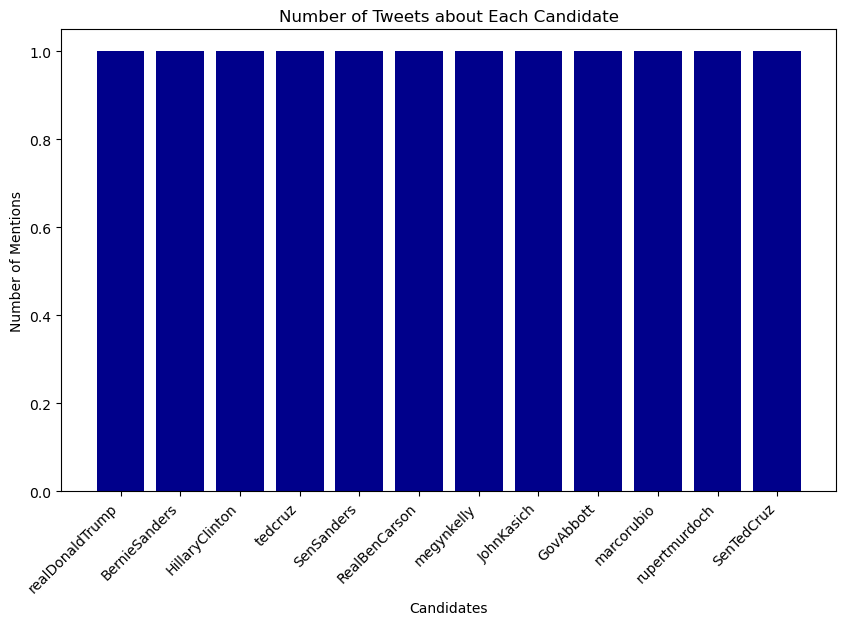

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(candidate_counts_filtered['Candidate'], candidate_counts_filtered['Mentions'], color='darkblue')
plt.xlabel('Candidates')
plt.ylabel('Number of Mentions')
plt.title('Number of Tweets about Each Candidate')
plt.xticks(candidate_names, rotation=45, ha='right')  # aligns to the right to show plot better
plt.show()